In [ ]:
# подключим библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import seaborn as sns
sns.set_style("dark")

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# добавим данные в датаафрейм

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/hotel_bookings.csv')

In [ ]:
# устанавливаем максимальное количество столбцов равным none

pd.set_option('display.max_columns', None)

#### Первоначальный обзор данных

In [ ]:
# выведем первые 5 строк таблицы

df.head()

Столбец `is_cancelled` является зависимой переменной в наборе данных. Номер 1 представляет бронирование, которое было отменено, а номер 0 — бронирование, которое не было отменено.

#### Информация о наборе данных

In [ ]:
# узнаем количество строк и столбцов в датафрейме

df.shape

(119390, 32)

In [ ]:
# распечатаем краткое резюме датафрейма

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# создаем описательную статистику датафрейма

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### EDA (Разведочный анализ данных)

In [ ]:
# метки столбцов датафрейма

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# уникальные типы отелей в датафрейме

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

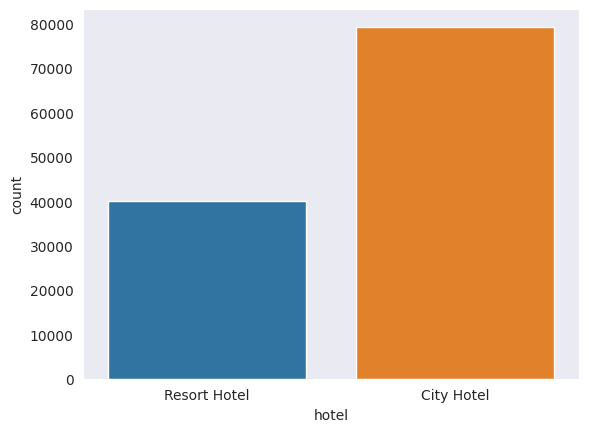

In [ ]:
# распределение по отелям Resort Hotel и City Hotel

sns.countplot(data=df, x='hotel');

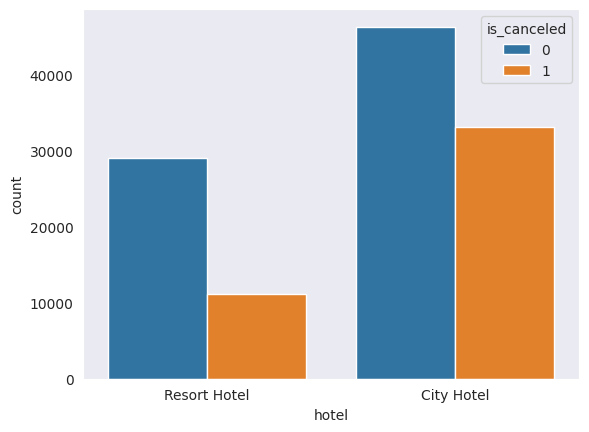

In [ ]:
# отменена ли бронь в отеле

sns.countplot(data=df, x='hotel', hue='is_canceled');

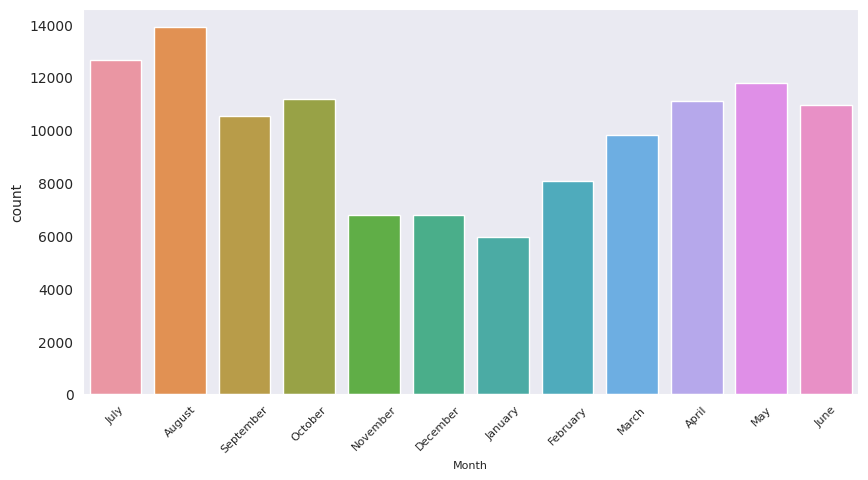

In [ ]:
# распределение даты прибытия в отель по месяцам

fig = plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='arrival_date_month')
plt.xlabel('Month', fontsize=8)
plt.xticks(rotation=45, fontsize=8);

In [ ]:
# уникальные типы номеров отелей в датафрейме

df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

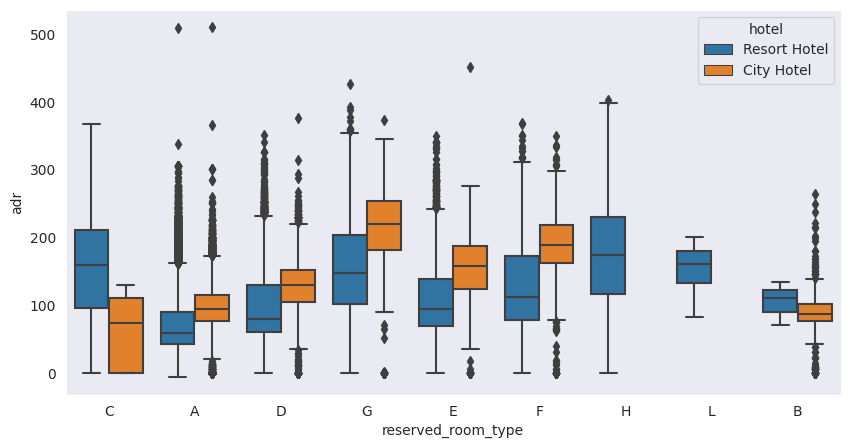

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь по типам номеров

data = df[df['is_canceled']==0]
fig = plt.figure(figsize=(10,5), dpi=100)
sns.boxplot(data=data, x='reserved_room_type', y='adr', hue='hotel');

adr mean: 101.83112153446686



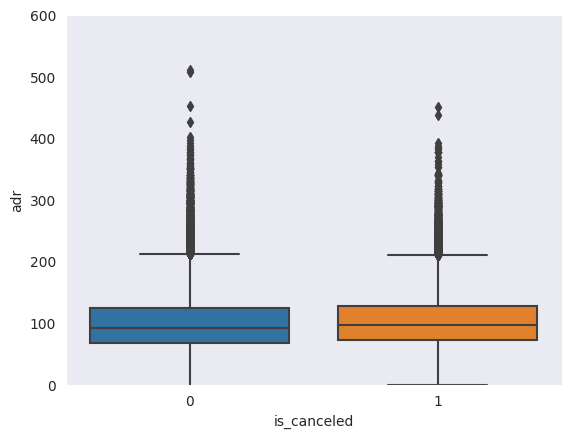

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь как для отмененных, так и для не отмененных бронирований

sns.boxplot(data=df, x='is_canceled', y='adr')
plt.ylim(0,600)
print("adr mean:", df['adr'].mean())
print()

In [ ]:
# количество значений для каждой страны

df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

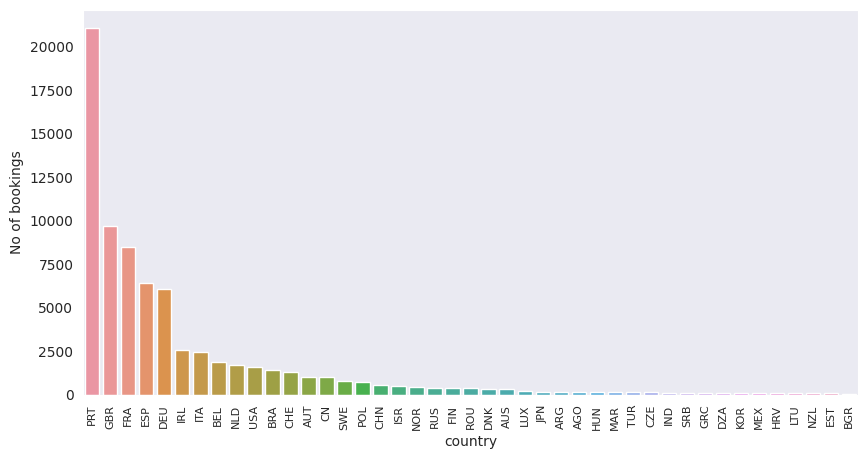

In [ ]:
# количество неотмененных бронирований для каждой страны

fig = plt.figure(figsize=(10,5), dpi=100)


country_wise_bookings = df[(df['is_canceled']==0)]['country'].value_counts().reset_index()
country_wise_bookings.columns = ['country', 'No of bookings']

country_wise_bookings = country_wise_bookings[country_wise_bookings['No of bookings'] > 60]

sns.barplot(data=country_wise_bookings, x='country', y='No of bookings')
plt.xticks(rotation=90, fontsize=8);

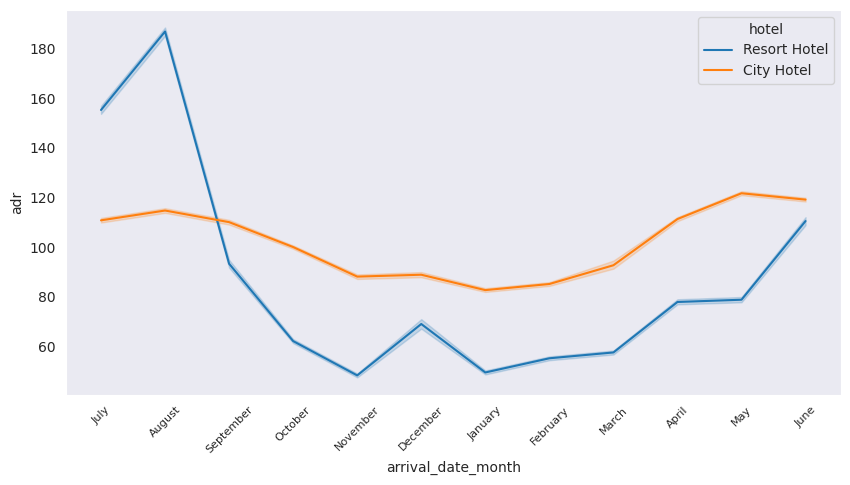

In [ ]:
# распределение средней стоимости проживания в номере за одну ночь по месяцам прибытия

fig = plt.figure(figsize=(10,5), dpi=100)

sns.lineplot(data=df, x='arrival_date_month', y='adr', hue='hotel')
plt.xticks(rotation=45, fontsize=8);

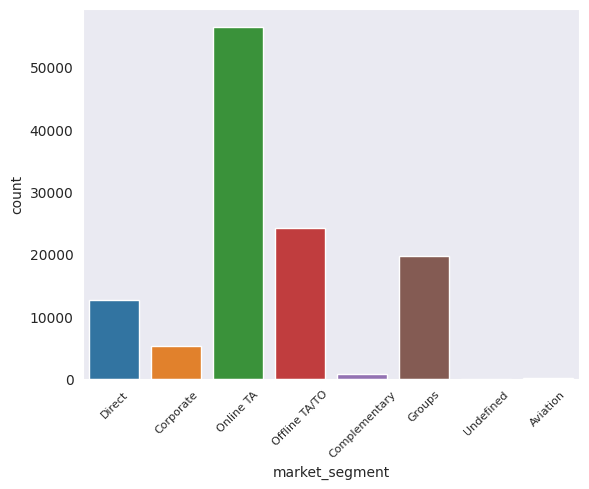

In [ ]:
# распределение сегментов рынка

sns.countplot(data=df, x='market_segment')
plt.xticks(rotation=45, fontsize=8);

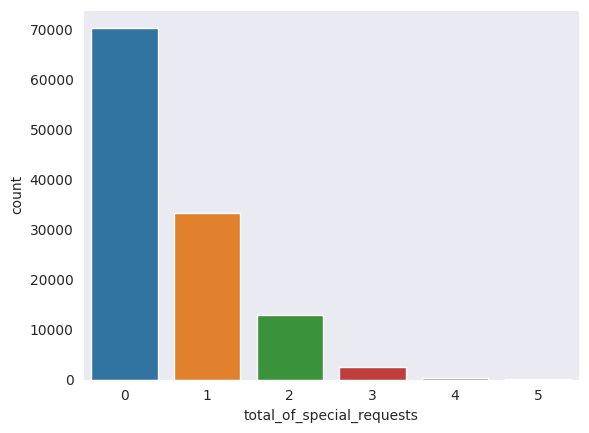

In [ ]:
# распределение общего количества специальных запросов

sns.countplot(data=df, x='total_of_special_requests');

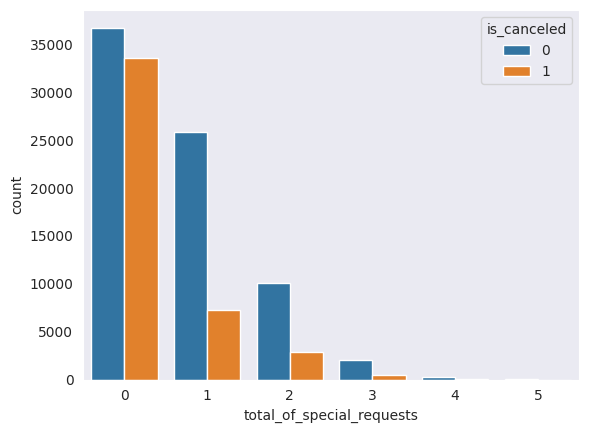

In [ ]:
# распределение общего количества специальных запросов как для отмененных, так и для не отмененных бронирований

sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled');

#### Подготовка данных

In [ ]:
# пропуски данных

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Мы удаляем ряд признаков по разным причинам. Признаки `company`, `agent` и `country` из-за большого количества пропусков заменяются категорией 0 в пропущенных значениях. Признак `children` не удаляется, так как пропусками являются только несколько значений. Однако наблюдения, в которых есть пропуски для `children`, удаляются. Признак `reservation_status` удален, так как это могло бы стать источником утечки данных. Этот признак имеет категории «No-Show: Неявка», «Check-Out: Выезд» и «Canceled: Отмена». Таким образом, мы могли бы вывести метку целевого класса из значения, указанного в `reservation_status`. Также отбрасывается признак `arrival_date_week_number`, так как он коррелирует с `arrival_date_month`. Таким образом, наличие этого признака привело бы к мультиколлинеарности. Наконец, `booking_changes` отбрасывается, так как значения могут меняться со временем и могут привести к утечке данных.

In [ ]:
# обработка пропусков в данных
df['company'] = df['company']. fillna(0)
df['country'] = df['country']. fillna('No Data')
df['agent'] = df['agent']. fillna(0)

df.drop(['reservation_status', 'arrival_date_week_number', 'booking_changes'], axis=1, inplace=True)
df.dropna(subset=['children'], inplace=True)

In [ ]:
# проверка 

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# проверяем балансировку

print(df["is_canceled"].value_counts()) 

0    75166
1    44220
Name: is_canceled, dtype: int64


Вывод показывает, что существует дисбаланс в количестве классов. Хотя дисбаланс не является серьезным, мы постараемся оценить классификаторы машинного обучения с помощью сложных метрик, таких как precision и recall, поскольку эти метрики учитывают любые дисбалансы классов.

---

Прежде чем строить модели машинного обучения, мы можем провести дополнительный анализ. Мы анализируем и исследуем данные, чтобы увидеть, сможем ли мы выявить какие-либо тенденции или закономерности.

In [ ]:
# проверяем корреляцию между метками и признаками

print(df.corr()["is_canceled"].sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.293177
previous_cancellations            0.110140
adults                            0.059990
days_in_waiting_list              0.054193
adr                               0.047622
stays_in_week_nights              0.024771
arrival_date_year                 0.016732
children                          0.005048
stays_in_weekend_nights          -0.001783
arrival_date_day_of_month        -0.006084
babies                           -0.032488
agent                            -0.046503
previous_bookings_not_canceled   -0.057355
company                          -0.082988
is_repeated_guest                -0.084788
required_car_parking_spaces      -0.195492
total_of_special_requests        -0.234706
Name: is_canceled, dtype: float64


#### Pre-processing

In [ ]:
# определяем целевую переменную от других признаков
df_choice=df.copy()
label = df["is_canceled"]
df.drop(['is_canceled'], axis=1, inplace=True)
# определяем числовые и категориальные признаки

df_num=df.select_dtypes(["int64","float"])
df_cat=df.select_dtypes("object") 

In [ ]:
del_cols=[]
for i in df_num :
  mymod = ols(str(i)+'~ is_canceled', data = df_choice).fit() 
  # performing type 2 anova test 
  aovtable = sm.stats.anova_lm(mymod, typ = 1) 
  if aovtable['PR(>F)'][0] > 0.05:
    print('ANOVA table for',i) 
    print('----------------------') 
    print(aovtable['PR(>F)']) 
    print() 
    #Записываем колонки на удаление
    del_cols.append(i)
df.drop(del_cols, axis=1, inplace=True)
df_num=df.select_dtypes(["int64","float"])
df_cat=df.select_dtypes("object") 

ANOVA table for stays_in_weekend_nights
----------------------
is_canceled    0.537767
Residual            NaN
Name: PR(>F), dtype: float64

ANOVA table for children
----------------------
is_canceled    0.081138
Residual            NaN
Name: PR(>F), dtype: float64



In [ ]:
# выведем уникальные значения в каждом категориальном признаке

for i in df_cat:
    print(i,df[i].nunique()) 

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 7
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status_date 926


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

si = SimpleImputer(strategy="most_frequent")
ss = StandardScaler() 
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')


num_pipeline = Pipeline([("imputer", si), ("scaler", ss)])
cat_pipeline = Pipeline([("imputer", si), ("encoder", oe)])
# новый пайплайн
cat_pipeline_log_regr = Pipeline([("imputer", si), ("encoder", ohe)])

mct = make_column_transformer((num_pipeline, df_num.columns),
                            (cat_pipeline, df_cat.columns),
                            remainder="passthrough")

# кодирование стлобцов с использованием нового пайплайна
mct_lr = make_column_transformer((num_pipeline, df_num.columns),
                            (cat_pipeline_log_regr, df_cat.columns),
                            remainder="passthrough")

df_transformed_1 = mct.fit_transform(df)
df_transformed_2 = mct_lr.fit_transform(df)
a = list(mct_lr.get_feature_names_out())
col=list(map(lambda x : x.split("__")[1],a))
a = list(df_num.columns)
b = list(df_cat.columns)
c = a + b
df_transformed = pd.DataFrame(data=list(df_transformed_1),columns=c) 

Анализ ANOVA - проверяется гипотеза о том , зависит ли от значений каждого из параметров целевой признак is_canceled - Если p-value меньше 0.05 , то заметных различия между группами внутри признака есть, если больше ,то нет.

#### Модели

Мы используем несколько классификаторов машинного обучения, чтобы предсказать, будет ли отменено бронирование отеля. Для этого исследования выбраны логистическая регрессия (Logistic Regression), дерево решений (Decision Tree), случайный лес (Random Forest) и классификатор голосования (Voting Classifier). Данные разделены на обучающие данные и тестовые данные. 70% данных используются для обучения модели, а остальные 30% используются в качестве тестовых данных. Тестовые данные позволяют нам оценить, как каждая модель работает с новыми данными. Перед развертыванием любых моделей создается окончательный набор пайплайнов. Он состоит из преобразований столбцов, содержащих этапы предварительной обработки, а также отдельных моделей машинного обучения.

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_predict
from datetime import datetime

# данный блок отвечает за сортировку данных по дате
cols = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']

# преобразование данных из cols сначала в строки , потом и в даты
df['str_date']= df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['Date'] = df['str_date'].apply(lambda row : datetime.strptime(row, '%Y %B %d'))

# сортировка
df=df.sort_values(by=['Date'])

# удаление временных столбцов
df.drop(['str_date','Date'],inplace=True,axis=1)
x = df
y = label

parametrs_lr = { 'Logistic Regression__C' : [0.5*i for i in range(1,4)] 
}
parametrs_rf = {
    'Random Forest__n_estimators' : [50*i for i in range(2,4)],
    'Random Forest__max_features' : ['sqrt', 'log2'],
    'Random Forest__max_leaf_nodes' : [200,250],
    'Random Forest__min_samples_split' : [3,4],
    'Random Forest__min_samples_leaf' : [i for i in range(1,3)],
    'Random Forest__max_depth' : [4,8,10]
}
# разделение данных на train и test выборки
tscv = TimeSeriesSplit(n_splits=3)

lr = LogisticRegression(max_iter=1000)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

classifiers = [("Logistic Regression", lr), ("DecisionTreeClassifier", dt), ("RandomForestClassifier", rf)]

vc = VotingClassifier(estimators=classifiers, voting='soft')

pipe_final1 = Pipeline([("column transformer", mct_lr),("Logistic Regression", lr)])
pipe_final2 = Pipeline([("column transformer", mct),("Decision Tree", dt)])
pipe_final3 = Pipeline([("column transformer", mct),("Random Forest", rf)])
pipe_final4 = Pipeline([("column transformer", mct),("Voting Classifier", vc)])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
df.shape

(119386, 26)

#### Оценка моделей

Функция оценки создается и определяется для эффективного представления и сравнения показателей оценки для каждой модели. Функция принимает объект модели машинного обучения, а также обучающие и тестовые значения для x и y в качестве входных данных. Затем функция возвращает показатель точности (accuracy score), показатель ROC (ROC score), матрицу путаницы (confusion matrix), отчет о классификации (classification report) и график ROC (ROC graph) для введенной модели. Мы также анализируем важность функций наиболее эффективной древовидной модели.

************************************************** 
 Logistic Regression metrics 
Accuracy Score is 0.9791439819080325 
Roc Auc Score 0.49002347417840375 
Confusion Matrix 
 [[23380   476]
 [   22     0]] 
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     23856
           1       0.00      0.00      0.00        22

    accuracy                           0.98     23878
   macro avg       0.50      0.49      0.49     23878
weighted avg       1.00      0.98      0.99     23878



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


************************************************** 
 Random Forest metrics 
Accuracy Score is 0.9990786498031661 
Roc Auc Score 0.5 
Confusion Matrix 
 [[23856     0]
 [   22     0]] 
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23856
           1       0.00      0.00      0.00        22

    accuracy                           1.00     23878
   macro avg       0.50      0.50      0.50     23878
weighted avg       1.00      1.00      1.00     23878



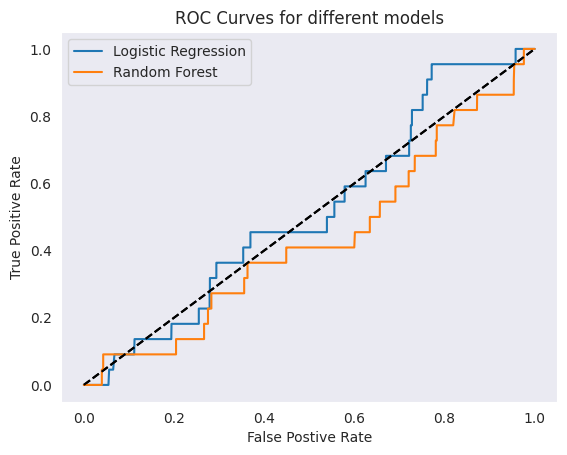

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV


score_values=[]


def evaluation(model,X,y,x_test,y_test,test="test"):
    model.fit(X,y)
    y_pred=model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cl = classification_report(y_test, y_pred)
    print('*'*50,"\n",test,"metrics","\nAccuracy Score is",acc,"\nRoc Auc Score",roc_auc,
          "\nConfusion Matrix","\n",cm,"\nClassification Report","\n",cl)
    
    score_values.append(acc)
    score_values.append(roc_auc)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=test)
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for different models")
    plt.plot([0,1],[0,1],"k--")
    plt.legend()

model1=GridSearchCV(pipe_final1,parametrs_lr,cv=tscv)
model2=GridSearchCV(pipe_final3,parametrs_rf,cv=tscv)
model_list=[("Logistic Regression", model1),
              ("Random Forest", model2)]

for name,model_type in model_list:
    evaluation(model_type,x,y,x_test,y_test,test=name)

plt.show()

In [ ]:
metric_table = pd.DataFrame(score_values[0:2], columns=["Logistic Regression"])
#metric_table["Decision Tree"] = score_values[2:4]
metric_table["Random Forest"] = score_values[2:4]
#metric_table["Voting Classifier"] = score_values[6:8]
metric_table["Metric"] = ["Accuracy Score", "ROC-AUC Score"]
metric_table.set_index("Metric", inplace=True)
metric_table

,Logistic Regression,Random Forest
Metric,,
Accuracy Score,0.979144,0.999079
ROC-AUC Score,0.490023,0.500000


In [ ]:
feat_importance = model2.best_estimator_.named_steps["Random Forest"].feature_importances_
feat_importance = pd.DataFrame(index=c, data=feat_importance,
columns = ['Feature Importance']).sort_values('Feature Importance', ascending=False)
feat_importance

,Feature Importance
arrival_date_month,0.489118
arrival_date_year,0.324258
adr,0.048240
lead_time,0.043152
arrival_date_day_of_month,0.015914
agent,0.012481
reservation_status_date,0.012474
market_segment,0.007630
days_in_waiting_list,0.006103
customer_type,0.005625
